<a href="https://colab.research.google.com/github/SteelworkerDB/ML_W2/blob/main/Ejercicio_Arbol_Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

1) Ejecutar un modelo de árbol de regresión con los parámetros por defecto (profundidad ilimitada)

In [36]:
df = pd.read_csv('/content/Boston_Housing_from_Sklearn.csv')
df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


In [37]:
y = df['PRICE']
X = df.drop(columns = 'PRICE')

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [39]:
dec_tree = DecisionTreeRegressor(random_state = 42)

In [40]:
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [41]:
#Importación de librerías para métrica R2
import numpy as np
from sklearn.metrics import r2_score


2) Determinar la profundidad del árbol por defecto.

In [42]:
#https://stackoverflow.com/questions/54499114/using-sklearn-how-do-i-find-depth-of-a-decision-tree
#Se utiliza getdepth del arbol
print(dec_tree.get_depth())

20


Profundidad:20

In [43]:
#R2 del arbol por defecto
r2_train = dec_tree.score(X_train, y_train)
r2_test = dec_tree.score(X_test, y_test)
print('R2 train: ', r2_train)
print('R2_test: ', r2_test)


R2 train:  1.0
R2_test:  0.6193230918136841


*A la maxima profundidad existe mucho sobreajuste.*

3) Intentar diferentes valores para max_depth y determinar el valor óptimo basándose en el mejor (el más alto) valor R2. ¿Cuál es el max_depth óptimo según las pruebas de ustedes?

¿Cuál es el R2 del modelo final en el conjunto de entrenamiento y de prueba?

In [44]:
r2_train_list=[]
r2_test_list =[]
for n in range(1,21):
  dec_tree = DecisionTreeRegressor(random_state = 42, max_depth=n)
  dec_tree.fit(X_train, y_train)
  train_preds = dec_tree.predict(X_train)
  test_preds = dec_tree.predict(X_test)
  r2_train = dec_tree.score(X_train, y_train)
  r2_test = dec_tree.score(X_test, y_test)
  r2_train_list.append(r2_train)
  r2_test_list.append(r2_test)

print(r2_train_list)
print(r2_test_list)

[0.47516388271269616, 0.7089458256236383, 0.8115215736998, 0.8766104793014514, 0.9033713134847527, 0.9427415954627864, 0.958516936961625, 0.9734292100601382, 0.9821037319610881, 0.9867962386381032, 0.9910995900493501, 0.9953582931891068, 0.9972237511667849, 0.9987074006648249, 0.999476270721798, 0.9998109710737704, 0.9999684869143183, 0.9999986611277523, 0.9999998512364169, 1.0]
[0.35488621492700445, 0.6370379660938668, 0.6928945219667566, 0.7080984792681855, 0.770697400084247, 0.8259854674532312, 0.8463768203632204, 0.6383005344293057, 0.6845876043422093, 0.8460104271509634, 0.8297363137769441, 0.8271023856015939, 0.814125554883834, 0.8229955282755737, 0.7338563810264247, 0.5752097762818518, 0.683430185486966, 0.6716605024065316, 0.7688469449948019, 0.6193230918136841]


20

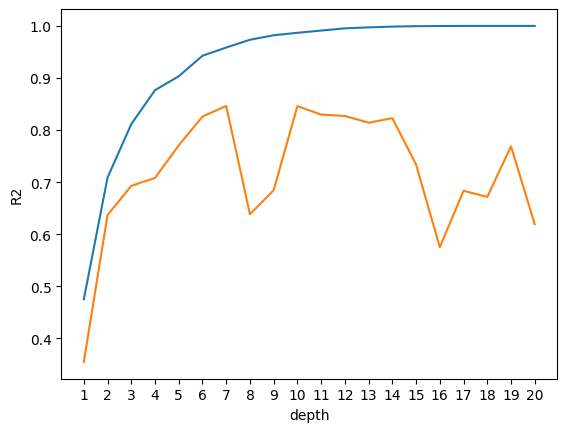

In [48]:
import matplotlib.pyplot as plt
plt.plot((range(1,21)), r2_train_list)
plt.plot((range(1,21)), r2_test_list)
plt.xlabel('depth')
plt.xticks(range(1,21))
plt.ylabel('R2');
len(range(1,21))

Del gráfico podemos observar que un árbol con profundidad 7 es la mejor opción, tiene un alto R2 para los valores de entrenamiento y prueba, y el sobreajuste todavía no llega a ser máximo.  